## Seattle_weather_Analysis using Logistic Regression

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import time
import datetime

In [2]:
# Load Dataset

data = pd.read_csv('seattleWeather_1948-2017.csv')
data.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


In [3]:
data.tail()

,DATE,PRCP,TMAX,TMIN,RAIN
25546,2017-12-10,0.0,49,34,False
25547,2017-12-11,0.0,49,29,False
25548,2017-12-12,0.0,46,32,False
25549,2017-12-13,0.0,48,34,False
25550,2017-12-14,0.0,50,36,False


In [4]:
data.shape

(25551, 5)

In [5]:
data.columns

Index(['DATE', 'PRCP', 'TMAX', 'TMIN', 'RAIN'], dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    25551 non-null  object 
 1   PRCP    25548 non-null  float64
 2   TMAX    25551 non-null  int64  
 3   TMIN    25551 non-null  int64  
 4   RAIN    25548 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 998.2+ KB


In [7]:
data.dtypes

DATE     object
PRCP    float64
TMAX      int64
TMIN      int64
RAIN     object
dtype: object

In [8]:
data.describe()

,PRCP,TMAX,TMIN
count,25548.000000,25551.000000,25551.000000
mean,0.106222,59.544206,44.514226
std,0.239031,12.772984,8.892836
min,0.000000,4.000000,0.000000
25%,0.000000,50.000000,38.000000
50%,0.000000,58.000000,45.000000
75%,0.100000,69.000000,52.000000
max,5.020000,103.000000,71.000000


In [9]:
data.isnull().sum()

DATE    0
PRCP    3
TMAX    0
TMIN    0
RAIN    3
dtype: int64

In [10]:
# to display null values in the RAIN column
data[pd.isnull(data['RAIN'])]

,DATE,PRCP,TMAX,TMIN,RAIN
18415,1998-06-02,NaN,72,52,NaN
18416,1998-06-03,NaN,66,51,NaN
21067,2005-09-05,NaN,70,52,NaN


In [11]:
data[pd.isnull(data['PRCP'])]

,DATE,PRCP,TMAX,TMIN,RAIN
18415,1998-06-02,NaN,72,52,NaN
18416,1998-06-03,NaN,66,51,NaN
21067,2005-09-05,NaN,70,52,NaN


<Axes: xlabel='RAIN', ylabel='count'>

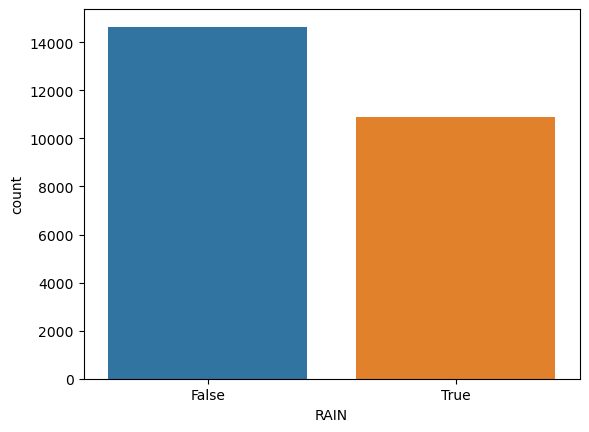

In [12]:
sns.countplot(data, x = 'RAIN')

In [13]:
data.RAIN.fillna(value = False, inplace = True)

In [14]:
data.isnull().sum()

DATE    0
PRCP    3
TMAX    0
TMIN    0
RAIN    0
dtype: int64

In [15]:
data.PRCP.mean()

0.10622162204477847

In [16]:
data.PRCP.fillna(data.PRCP.mean(), inplace = True)

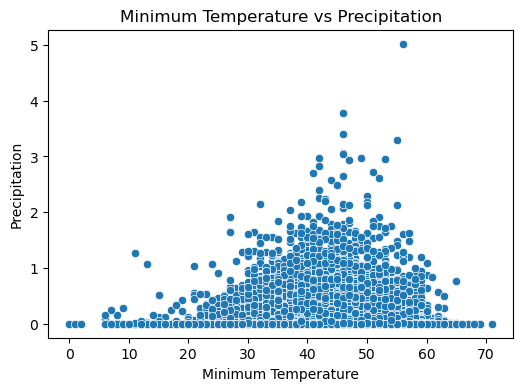

In [17]:
# Plotting Min Temperature against Precipitation to check how it impacts

plt.figure(figsize = (6,4))
sns.scatterplot(x = 'TMIN', y = 'PRCP', data = data)
plt.title('Minimum Temperature vs Precipitation')
plt.xlabel('Minimum Temperature')
plt.ylabel('Precipitation')
plt.show()

<Axes: xlabel='TMIN', ylabel='Density'>

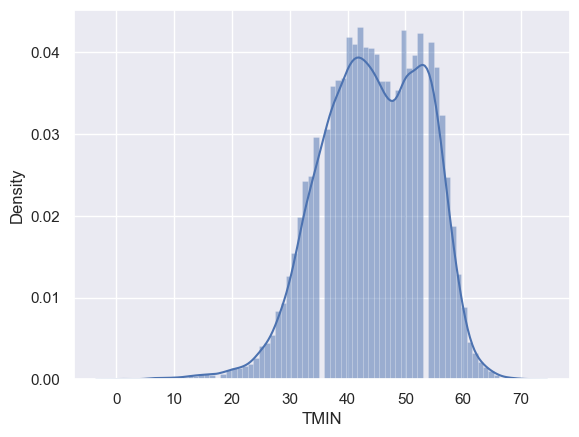

In [18]:
sns.set_theme()
sns.histplot(data, x = 'TMIN', kde = True, stat = 'density', kde_kws=dict(cut = 3),
            alpha = 0.5, edgecolor = (1,1,1,.3))

<Axes: xlabel='TMAX', ylabel='Density'>

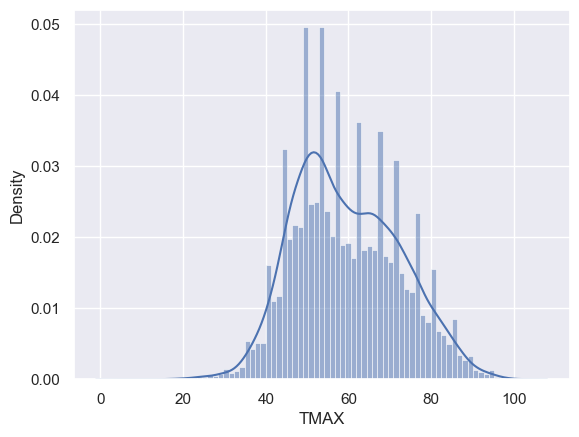

In [19]:
sns.histplot(data, x = 'TMAX', kde = True, stat = 'density', kde_kws=dict(cut = 3))

C:\Users\Shashank Kamatagi\AppData\Local\Temp\ipykernel_12740\317704611.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['TMAX'])


<Axes: xlabel='TMAX', ylabel='Density'>

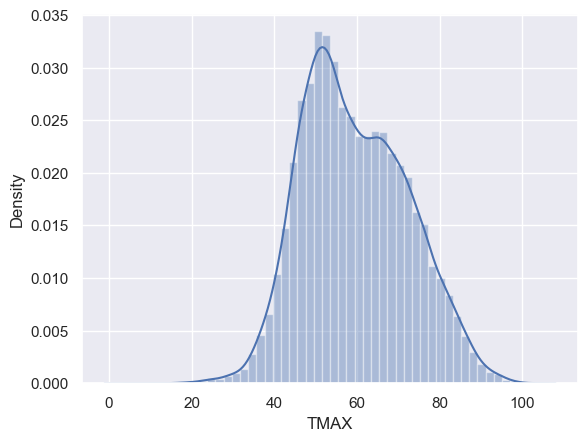

In [20]:
sns.distplot(data['TMAX'])

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


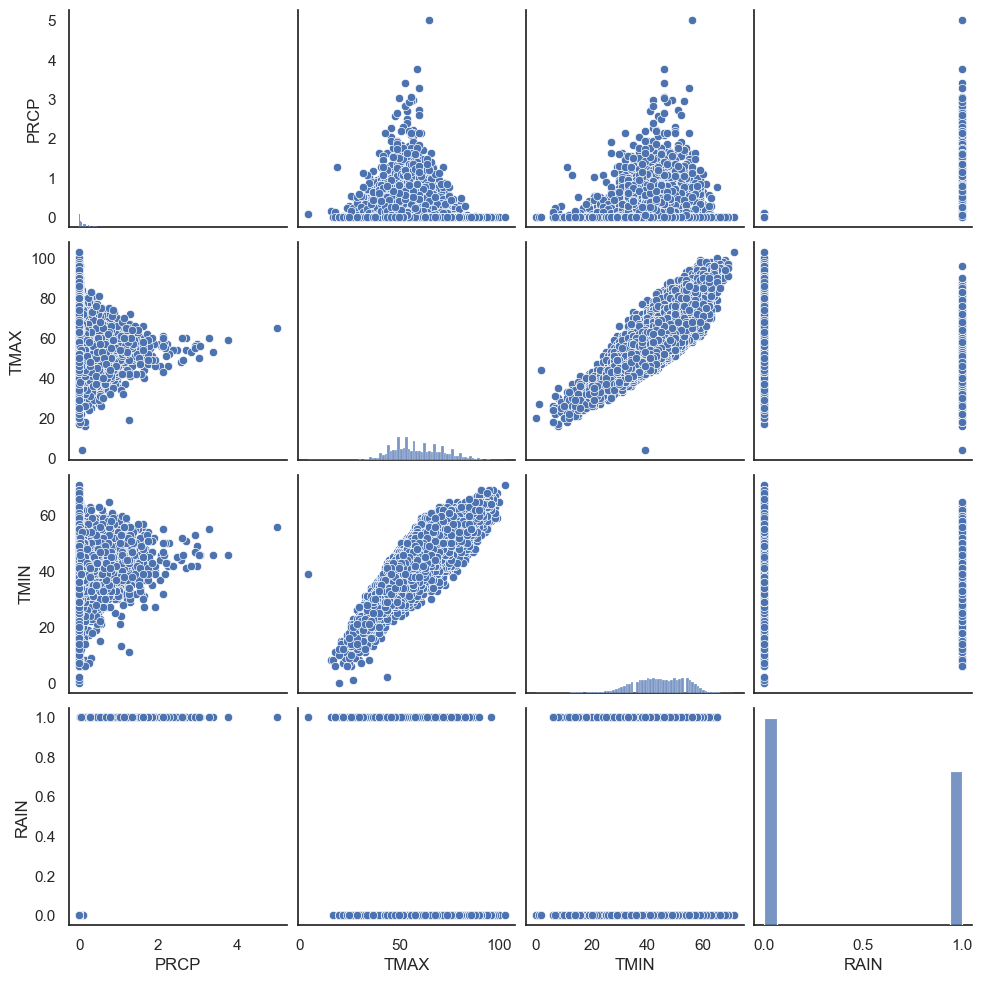

In [21]:
sns.set(style = 'white')
sns.pairplot(data)

<Axes: >

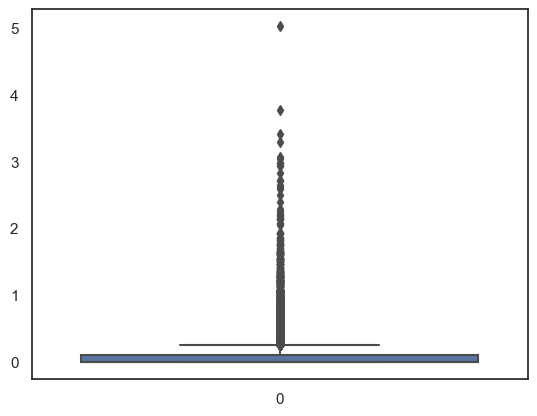

In [22]:
sns.boxplot(data['PRCP'])

<Axes: xlabel='PRCP', ylabel='Density'>

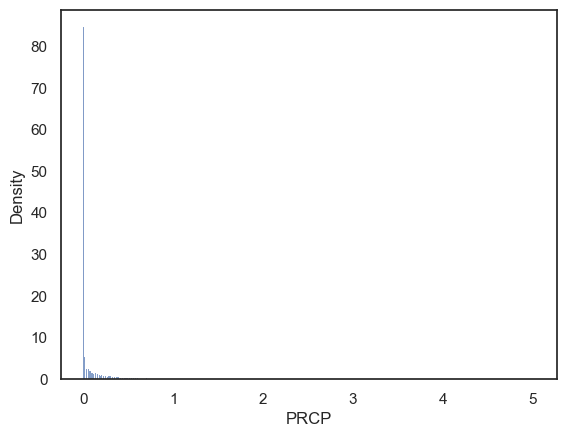

In [23]:
sns.histplot(data, x = 'PRCP', stat = 'density')

In [24]:
data = data.drop(data[data['PRCP'] > 0.25].index)

In [25]:
data.shape

(21993, 5)

In [26]:
data.shape

(21993, 5)

<Axes: xlabel='PRCP', ylabel='Count'>

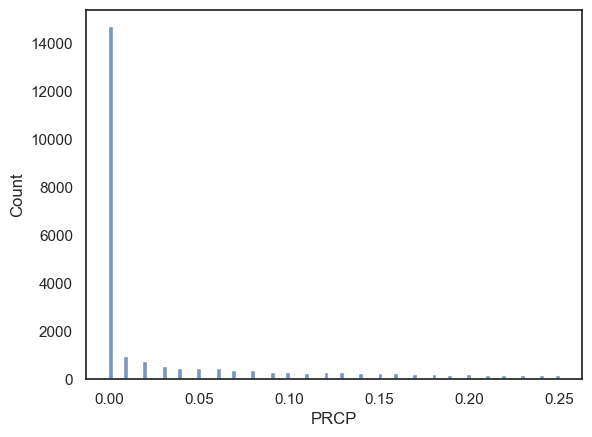

In [27]:
sns.histplot(data['PRCP'])

In [28]:
data[data['PRCP']<0].count()

DATE    0
PRCP    0
TMAX    0
TMIN    0
RAIN    0
dtype: int64

<Axes: xlabel='PRCP'>

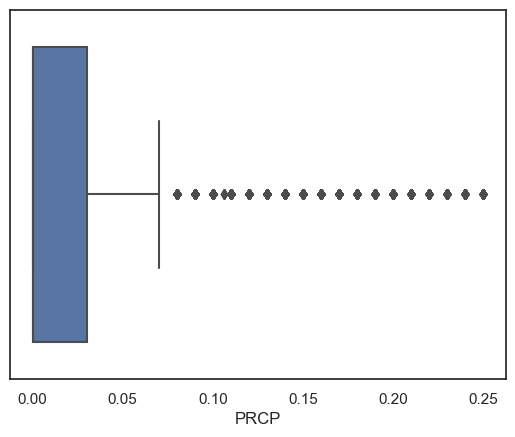

In [29]:
sns.boxplot(data, x = 'PRCP')

In [30]:
data.PRCP.describe()

count    21993.000000
mean         0.030511
std          0.059206
min          0.000000
25%          0.000000
50%          0.000000
75%          0.030000
max          0.250000
Name: PRCP, dtype: float64

<Axes: xlabel='TMIN'>

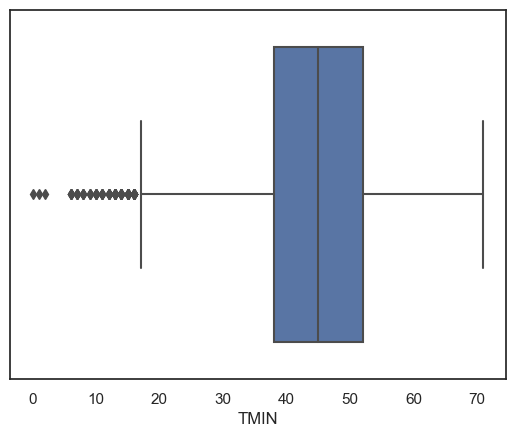

In [31]:
sns.boxplot(data, x = 'TMIN')

In [32]:
data = data.drop(data[data['TMIN']< 17].index)

<Axes: xlabel='TMAX'>

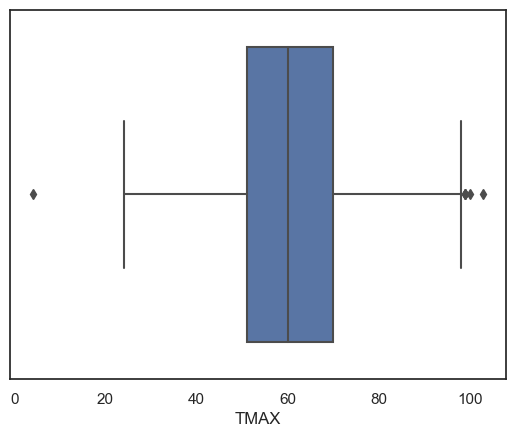

In [33]:
sns.boxplot(data, x = 'TMAX')

In [34]:
data[data['TMAX']>98].count()

DATE    5
PRCP    5
TMAX    5
TMIN    5
RAIN    5
dtype: int64

In [35]:
data[data['TMAX']<20].count()

DATE    1
PRCP    1
TMAX    1
TMIN    1
RAIN    1
dtype: int64

In [36]:
data = data.drop(data[(data['TMAX']>98) | (data['TMAX']<20)].index)

<Axes: >

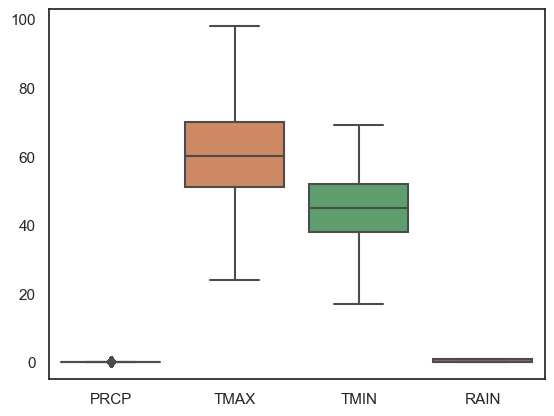

In [37]:
sns.boxplot(data)

In [38]:
data.shape

(21899, 5)

In [39]:
# Building the Logistic Regression Model

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [41]:
data.RAIN.value_counts()

RAIN
False    14575
True      7324
Name: count, dtype: int64

In [42]:
data = data.drop(['DATE'],axis = 1)

In [43]:
y = data['RAIN']

In [44]:
X = data.drop(['RAIN'], axis = 1)

In [45]:
X.head()

,PRCP,TMAX,TMIN
4,0.17,45,32
7,0.04,48,35
8,0.12,50,31
10,0.01,42,32
11,0.00,41,26


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [47]:
LogReg = LogisticRegression()

In [48]:
LogReg.fit(X_train, y_train)

LogisticRegression()

In [49]:
y_pred = LogReg.predict(X_test)

In [50]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import metrics

In [51]:
confusion_matrix(y_test, y_pred)

array([[4370,   11],
       [ 558, 1631]], dtype=int64)

<Axes: >

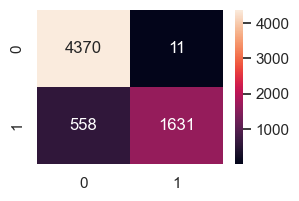

In [52]:
plt.figure(figsize= (3,2))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = '0.4g')

# (0,0) --> True Negative 
# (0,1) --> False Positive - Type I error
# (1,0) --> False Negative - Type II error
# (1,1) --> True Positive

In [53]:
acc = (4370 + 1631)/(4370+11+558+1631)
acc

0.9133942161339421

In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.89      1.00      0.94      4381
        True       0.99      0.75      0.85      2189

    accuracy                           0.91      6570
   macro avg       0.94      0.87      0.90      6570
weighted avg       0.92      0.91      0.91      6570



In [55]:
accuracy_score(y_test, y_pred)

0.9133942161339421

In [56]:
LogReg.predict_proba(X_test)

array([[0.86152745, 0.13847255],
       [0.87609087, 0.12390913],
       [0.45515873, 0.54484127],
       ...,
       [0.00590576, 0.99409424],
       [0.93334733, 0.06665267],
       [0.98115091, 0.01884909]])

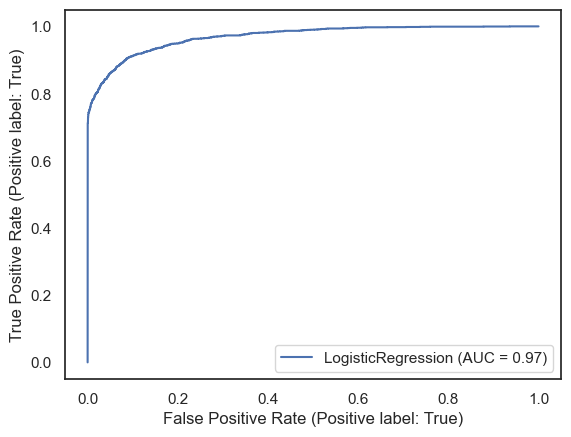

In [57]:
metrics.RocCurveDisplay.from_estimator(LogReg, X_test, y_test)